# Data Visualization and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


In [4]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


281 Plus Services, 266 Basic-services, 236 Total Services, 217 E-Services. (balanced)

<Axes: >

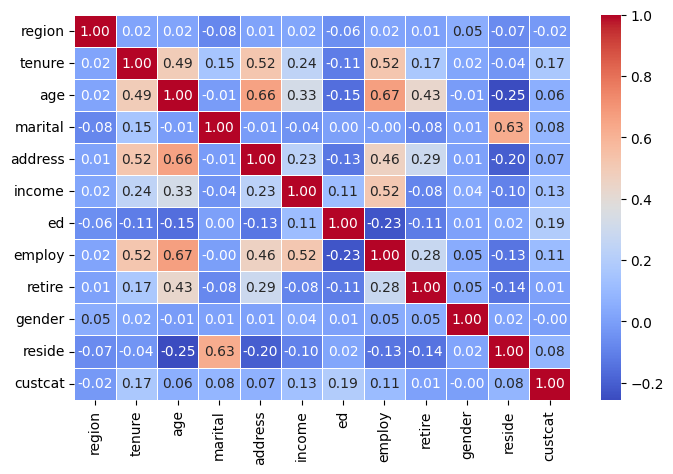

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [8]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


# Training & Evaluating

In [12]:
X = df.drop('custcat',axis=1)
y = df['custcat']
X_norm = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [13]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

In [23]:
yhat = knn_model.predict(X_test)

In [15]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


In [16]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


K: number of nearest neighbors to examine. K affects the model. The general way: train on a set of k and noting the performance.

Check the performance of the model for 10 values of k, ranging from 1-100.

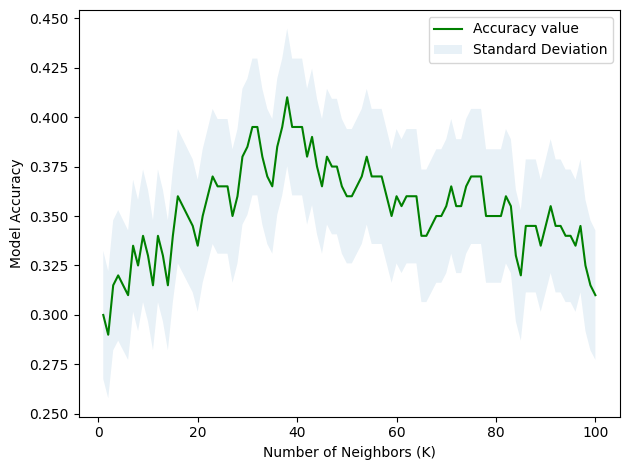

In [20]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.41 with k = 38
